# Random Forest(company Data)

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data (1).csv to Company_Data (1).csv


In [ ]:
cd=pd.read_csv("Company_Data (1).csv")

In [ ]:
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
cd.shape

(400, 11)

In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
cd.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

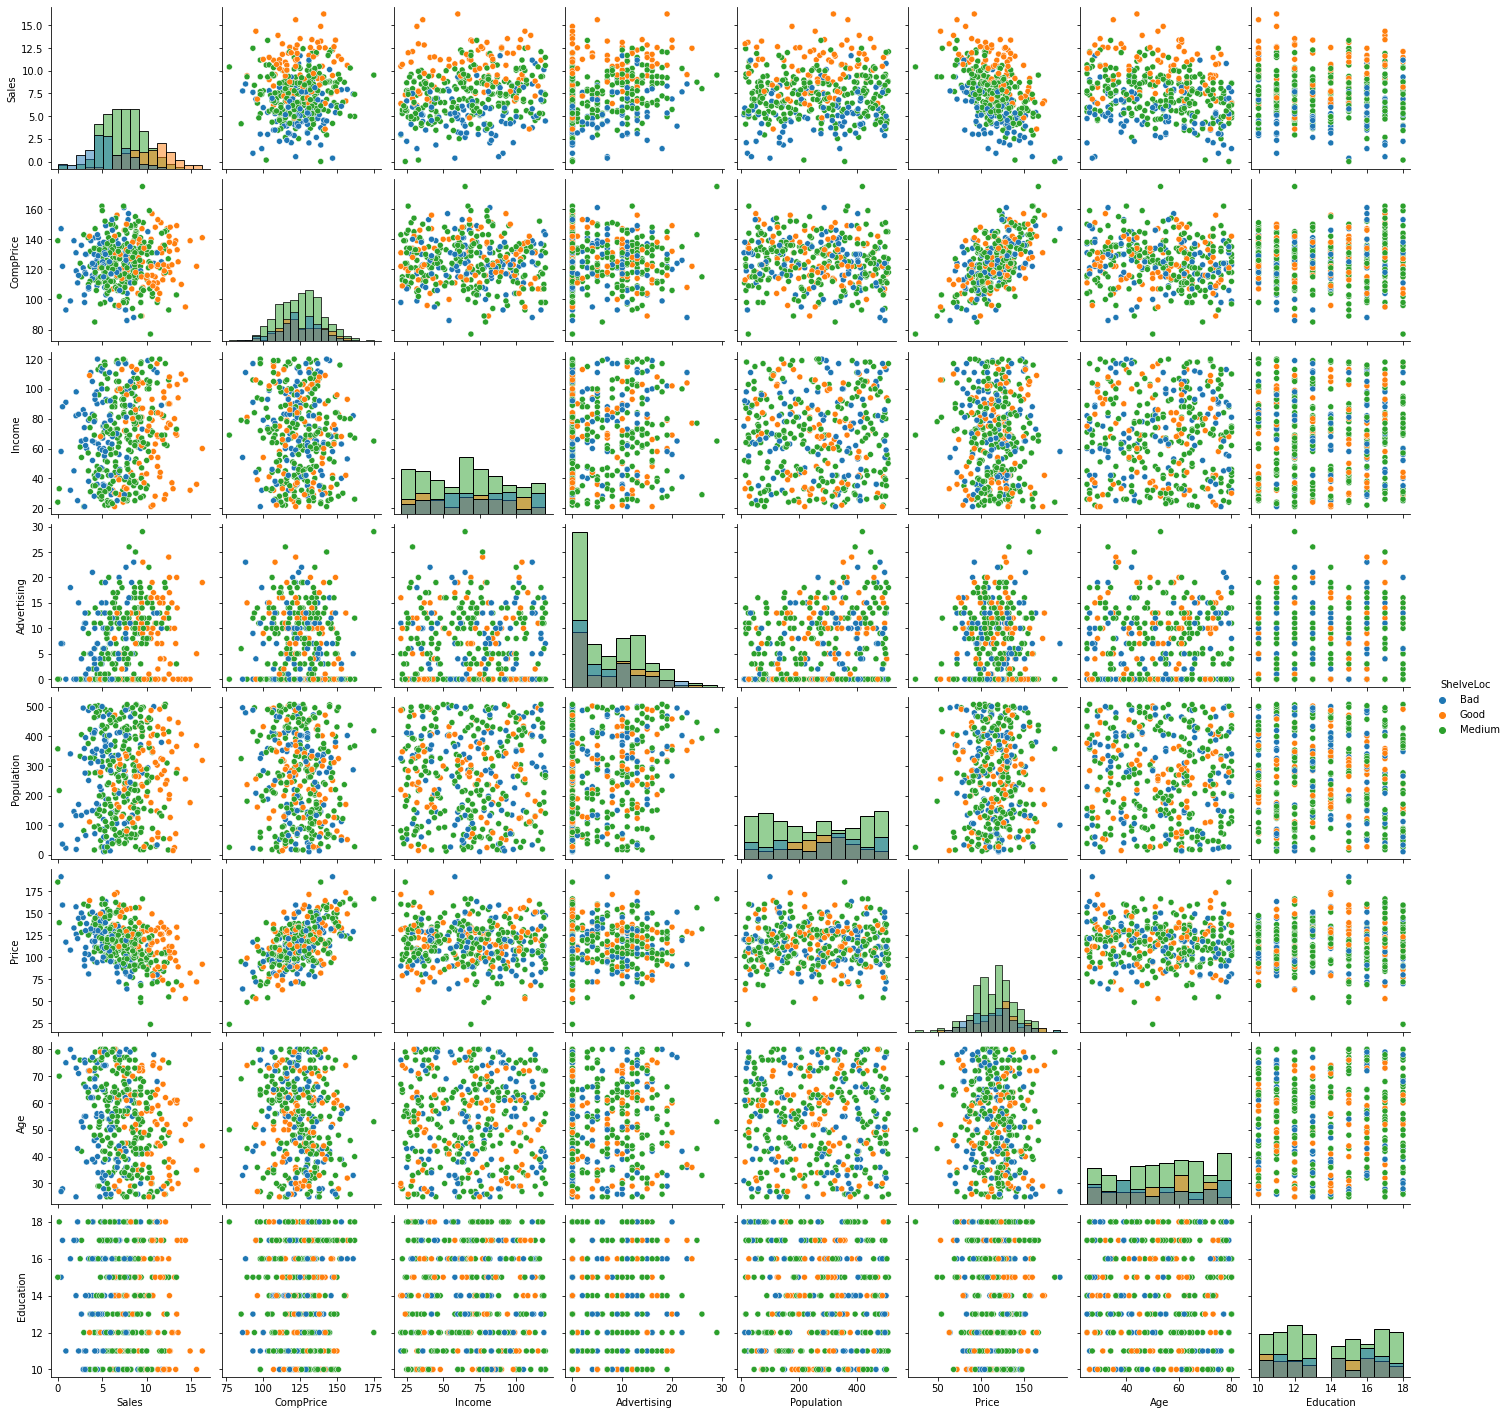

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=cd, hue="ShelveLoc", diag_kind="hist")
plt.show()

In [ ]:
cd.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
#Categorical variables
category= [var for var in cd.columns if cd[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(category)))
print('The categorical variables are as follows :\n\n', category)

There are 3 categorical variables

The categorical variables are as follows :

 ['ShelveLoc', 'Urban', 'US']


In [ ]:
#Numerical variables
numerical = [var for var in cd.columns if cd[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [ ]:
# cardinality check
for var in category:   
    print(var, 'has ', len(cd[var].unique()), ' labels')

ShelveLoc has  3  labels
Urban has  2  labels
US has  2  labels


In [ ]:
cd[cd.duplicated()].shape

(0, 11)

In [ ]:
#preprocrssing the Categorical values in the Company dataset
#Creating dummy vairables dropping first dummy variable
cd=pd.get_dummies(cd,columns=['Urban','US'], drop_first=True)

In [ ]:
cd['ShelveLoc']=cd['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [ ]:
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [ ]:
cd["Sales"].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [ ]:
cd['Sales'] = pd.cut(cd['Sales'], bins=[-1, 7.5, 16.3], labels=['low', 'high'])

In [ ]:
cd.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,high,138,73,11,276,120,3,42,17,1,1
1,high,111,48,16,260,83,1,65,10,1,1
2,high,113,35,10,269,80,2,59,12,1,1
3,low,117,100,4,466,97,2,55,14,1,1
4,low,141,64,3,340,128,3,38,13,1,0


In [ ]:
label_encoder = preprocessing.LabelEncoder()
cd['Sales']=label_encoder.fit_transform(cd['Sales'])

In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int64
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban_Yes    400 non-null    uint8
 10  US_Yes       400 non-null    uint8
dtypes: int64(9), uint8(2)
memory usage: 29.0 KB


In [ ]:
cd.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban_Yes      0
US_Yes         0
dtype: int64

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(cd)
df_norm.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,0.0,0.622449,0.525253,0.379310,0.533066,0.574850,1.0,0.309091,0.875,1.0,1.0
1,0.0,0.346939,0.272727,0.551724,0.501002,0.353293,0.0,0.727273,0.000,1.0,1.0
2,0.0,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250,1.0,1.0
3,1.0,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500,1.0,1.0
4,1.0,0.653061,0.434343,0.103448,0.661323,0.622754,1.0,0.236364,0.375,1.0,0.0
5,0.0,0.479592,0.929293,0.448276,0.983968,0.287425,1.0,0.963636,0.750,0.0,1.0
6,1.0,0.387755,0.848485,0.000000,0.070140,0.502994,0.5,0.836364,0.625,1.0,0.0
7,0.0,0.602041,0.606061,0.517241,0.831663,0.574850,0.0,0.763636,0.000,1.0,1.0
8,1.0,0.561224,0.898990,0.000000,0.196393,0.598802,0.5,0.927273,0.000,0.0,0.0
9,1.0,0.561224,0.929293,0.000000,0.242485,0.598802,0.5,0.927273,0.875,0.0,1.0


In [ ]:
x=df_norm.iloc[:,1:]
y=df_norm['Sales']

In [ ]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,0.622449,0.525253,0.379310,0.533066,0.574850,1.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.0,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,1.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.0,0.145455,0.500,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.5,0.545455,0.125,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.5,0.272727,1.000,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,1.0,0.454545,0.250,1.0,1.0


In [ ]:
y

0      0.0
1      0.0
2      0.0
3      1.0
4      1.0
      ... 
395    0.0
396    1.0
397    1.0
398    1.0
399    0.0
Name: Sales, Length: 400, dtype: float64

In [ ]:
df_norm.Sales.value_counts()

1.0    202
0.0    198
Name: Sales, dtype: int64

In [ ]:
colnames = list(cd.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

### Building Random forest  Classifier model

In [ ]:
model01 = RandomForestClassifier(n_estimators=100, max_depth=10)
model01.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
results = cross_val_score(model01, x, y, cv=kfold)

In [ ]:
print(results.mean())

0.82


In [ ]:
#Predicting on test data
preds01 = model01.predict(x_test) # predicting on test data set 
pd.Series(preds01).value_counts() # getting the count of each category 

1.0    65
0.0    55
dtype: int64

In [ ]:
preds01

array([0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1.])

In [ ]:
pd.crosstab(y_test,preds01) # getting the 2 way table to understand the correct and wrong predictions|

col_0,0.0,1.0
Sales,,
0.0,40,12
1.0,15,53


In [ ]:
# Accuracy 
np.mean(preds01==y_test)

0.775

### finding the best hyperparameter using grid searchCV

In [ ]:
# Define the hyperparameter grid
param_grid = {'n_estimators': [100, 200, 300,400],
              'max_depth': [10, 20, 30,40]}

In [ ]:
# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)

In [ ]:
# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'n_estimators': [100, 200, 300, 400]})

In [ ]:
# Get the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 30, 'n_estimators': 400}


In [ ]:
model_best = RandomForestClassifier(n_estimators=400, max_depth=30)
model_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=400)

In [ ]:

#Predicting on test data
preds = model_best.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1.0    62
0.0    58
dtype: int64

In [ ]:
preds

array([0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1.])

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions|

col_0,0.0,1.0
Sales,,
0.0,41,11
1.0,17,51


In [ ]:
print("the accuracy of the model =",accuracy_score(y_test,preds)*100)

the accuracy of the model = 76.66666666666667


Random forest is the ensemble of the Decision trees and it is very useful in drawing the specific inferences form the data such as feature_importance and also to check the over fitting of the model
    
    here the model created is of accuracy 80.0% which is a good model
    also we can plot the individaul decision trees of the Random forest 

##### plotting of individual trees

In [ ]:
# Get the first decision tree in the random forest
# this may be used to plot any of the tree from the forest
tree = model_best.estimators_[0]

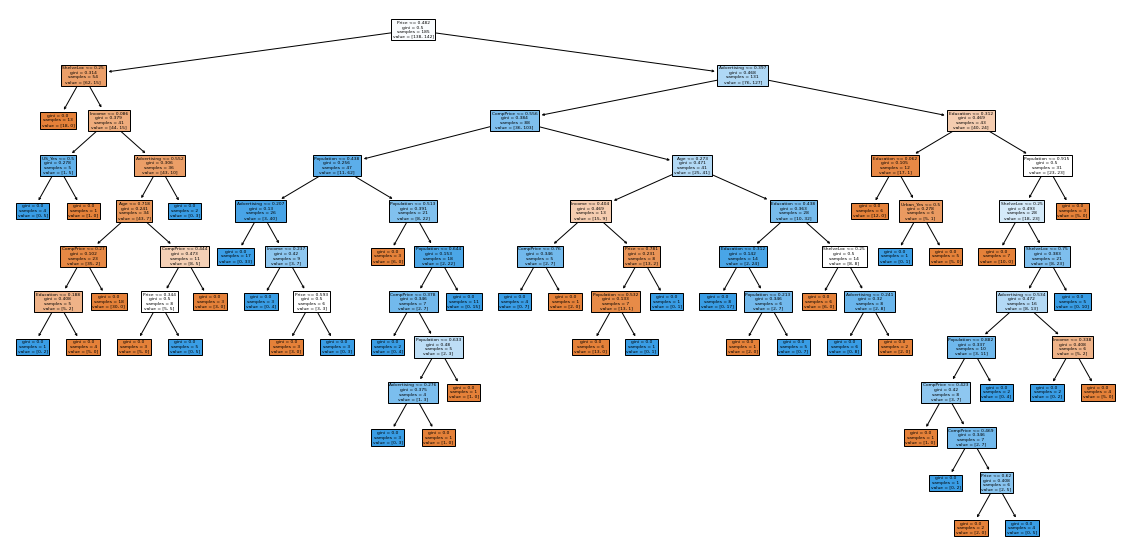

In [ ]:
# Plot the decision tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=x.columns)
plt.show()